# Project name: Exploration of Crime in New York

Student: OsloMet Summer School 2019 
Gotovkina Marina
marina.webdev@gmail.com

This notebook was mostlly made during the OsloMet Summer school 2019.
Toghether with my team members, Margaretha Hansen, Alex Harkov, Martin Storsnes, I was working on the exploration of crime data in NYC. 
It's important to note that some code written in notebook is a joint effort of this group.


In [181]:
# Import all the libraries 

import seaborn as sns
import matplotlib
import numpy as np
import pylab as plab
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn import datasets, linear_model

In [182]:
data = pd.read_csv("final_dataset.csv")
data.head()

,boro,dbn,sch_name,zoned_dist,CMPLNT_NUM,CMPLNT_FR_,CMPLNT_FR1,KY_CD,OFNS_DESC,LAW_CAT_CD,...,% Male,% Asian,% Black,% Hispanic,% Multiple Race Categories Not Represented,% White,% Students with Disabilities,% English Language Learners,% Poverty,Economic Need Index
0,5,31R455,TOTTENVILLE HIGH SCHOOL,31,899609148,2013-08-15,12:00:00,361,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,...,51.3,4.6,1.9,10.7,1.1,81.6,15.3,1.0,31.0,No Data
1,5,31R455,TOTTENVILLE HIGH SCHOOL,31,983352892,2013-07-29,15:30:00,578,HARRASSMENT 2,VIOLATION,...,51.3,4.6,1.9,10.7,1.1,81.6,15.3,1.0,31.0,No Data
2,5,31R455,TOTTENVILLE HIGH SCHOOL,31,264059104,2013-11-08,02:30:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,...,51.3,4.6,1.9,10.7,1.1,81.6,15.3,1.0,31.0,No Data
3,5,31R455,TOTTENVILLE HIGH SCHOOL,31,344840948,2013-10-19,22:21:00,107,BURGLARY,FELONY,...,51.3,4.6,1.9,10.7,1.1,81.6,15.3,1.0,31.0,No Data
4,5,31R455,TOTTENVILLE HIGH SCHOOL,31,203854334,2013-08-13,21:45:00,578,HARRASSMENT 2,VIOLATION,...,51.3,4.6,1.9,10.7,1.1,81.6,15.3,1.0,31.0,No Data


In [183]:
data.describe()

,boro,zoned_dist,CMPLNT_NUM,KY_CD,Latitude,Longitude,% Female,% Male,% Asian,% Black,% Hispanic,% Multiple Race Categories Not Represented,% White,% Students with Disabilities,% English Language Learners,% Poverty
count,495674.000000,495674.000000,4.956740e+05,495674.000000,495674.000000,495674.000000,128264.000000,128264.000000,128264.000000,128264.000000,128264.000000,128264.000000,128264.000000,128264.000000,128264.000000,128264.000000
mean,2.606683,7.184803,5.506817e+08,292.728114,40.733886,-73.925159,44.955286,55.044714,19.430564,25.565435,36.536522,1.425698,17.049026,16.168472,14.092144,71.456261
std,1.183150,11.532773,2.596867e+08,147.870332,0.082500,0.077356,4.940203,4.940203,12.854731,24.624346,17.234649,1.058829,17.313534,4.342509,9.252012,9.540720
min,1.000000,0.000000,1.000024e+08,101.000000,40.498905,-74.254560,36.600000,45.300000,0.900000,1.900000,8.500000,0.300000,1.200000,10.100000,1.000000,31.000000
25%,2.000000,0.000000,3.259801e+08,117.000000,40.672880,-73.972719,42.700000,51.100000,7.400000,8.700000,25.700000,0.800000,3.500000,12.700000,5.600000,67.200000
50%,3.000000,0.000000,5.509500e+08,341.000000,40.729939,-73.927012,43.700000,56.300000,20.400000,15.500000,33.600000,1.300000,10.500000,14.700000,13.700000,72.600000
75%,3.000000,16.000000,7.750370e+08,351.000000,40.809855,-73.882917,48.900000,57.300000,27.500000,32.400000,49.400000,1.600000,21.600000,18.900000,19.700000,76.000000
max,5.000000,31.000000,9.999974e+08,881.000000,40.912723,-73.700316,54.700000,63.400000,52.700000,87.900000,64.300000,6.000000,81.600000,26.600000,36.200000,88.100000


In [184]:
data.shape

(495674, 33)

In [185]:
# Remove rows that have NaNs 
data.dropna(inplace=True)

In [186]:
# data where droped NaNs
data.shape 

(127794, 33)

In [187]:
# Drop Economic Need Index as it has No Data in all the rows
# Drop DBN_x and DBN_y as it dublicates dbn column 
# Drop SCHOOL NAME as we have School Name

data = data.drop(columns=['Economic Need Index', 'DBN_x', 'DBN_y', 'SCHOOL NAME'])

In [188]:
# data where droped dublicated columns 
data.shape 

(127794, 29)

# Types of crime data manipulation

**Plan:**
1. Look at the unique types of crime (OFNS_DESC)
2. Look at the number of instances of unique types of crime (KY_CD)
3. Visualize which types of crime occurred the most.
4. Get the types of crime that happened less than 2000 times
5. Drop the types of crime that occurred less than 2000 times 
6. Look at the types of crimes that occurred over 2000 times
 - 6.1. Get those types of crimes that have occurred more than 2,000 times
 - 6.2. Get the descriptions of the types of crime that happened more than 2000
7. Group the types of crime that occurred more than 2000 times based on context and level of crime according to the NY Penal Code
 - 7.1. Create new classes

8. Drop the types of crime under 3000 and drop miscellaneous as no indication of the type of crime (and just over 3000)





### 1. Look at the unique types of crime (OFNS_DESC)

In [189]:
data["OFNS_DESC"].unique()

array(['OFF. AGNST PUB ORD SENSBLTY &', 'HARRASSMENT 2',
       'ASSAULT 3 & RELATED OFFENSES', 'BURGLARY', 'ADMINISTRATIVE CODE',
       'UNAUTHORIZED USE OF A VEHICLE', 'CRIMINAL MISCHIEF & RELATED OF',
       'GRAND LARCENY', 'ARSON', 'PETIT LARCENY', 'FELONY ASSAULT',
       'ROBBERY', 'OFFENSES AGAINST PUBLIC ADMINI', 'DANGEROUS WEAPONS',
       'DANGEROUS DRUGS', 'VEHICLE AND TRAFFIC LAWS',
       'INTOXICATED & IMPAIRED DRIVING', 'FRAUDS', 'THEFT-FRAUD',
       'MISCELLANEOUS PENAL LAW', 'CRIMINAL TRESPASS',
       'GRAND LARCENY OF MOTOR VEHICLE', 'POSSESSION OF STOLEN PROPERTY',
       'OFFENSES AGAINST THE PERSON', 'RAPE', 'SEX CRIMES',
       'OFFENSES INVOLVING FRAUD', 'FORGERY',
       'OTHER OFFENSES RELATED TO THEF', "BURGLAR'S TOOLS",
       'NYS LAWS-UNCLASSIFIED FELONY', 'OFFENSES AGAINST PUBLIC SAFETY',
       'ENDAN WELFARE INCOMP', 'DISORDERLY CONDUCT',
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'JOSTLING',
       'PETIT LARCENY OF MOTOR VEHICLE', 'KIDNAPPING & RELAT

/Users/marinagotovkina/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



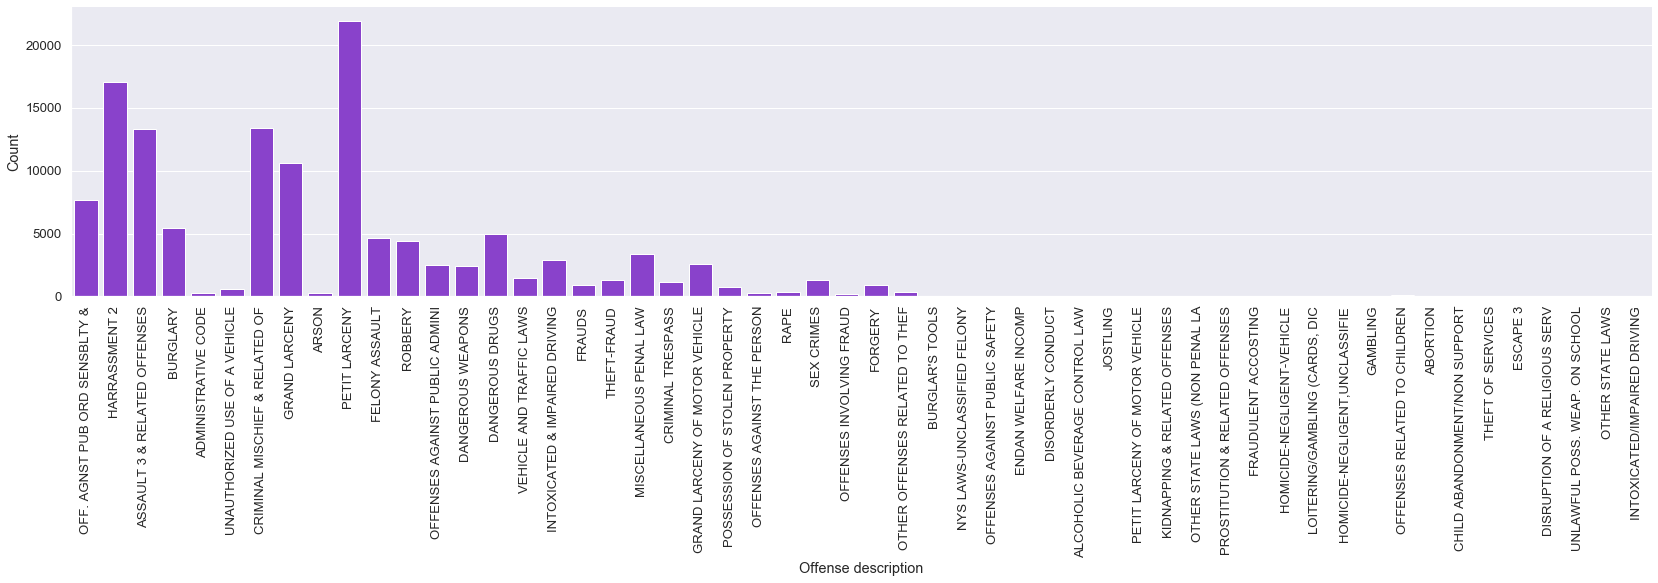

In [190]:
# Make a barchart on how many type crime types (histogram) BEFORE grouping


sns.set(font_scale = 1.2)
g = sns.factorplot("OFNS_DESC", data=data, aspect=5, kind="count", color="blueviolet")
g.set(xlabel="Offense description", ylabel='Count')
g.set_xticklabels(rotation=90)

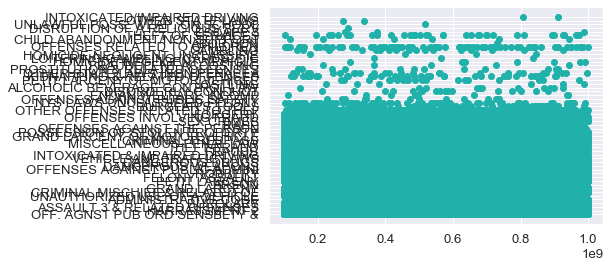

In [191]:
# Plot data, regression line
plt.figure(1)
plt.scatter(data['CMPLNT_NUM'], data['OFNS_DESC'], color='lightseagreen')
plt.show()

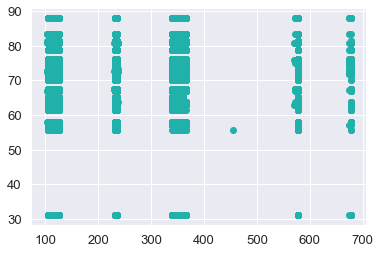

In [192]:
# Plot data, regression line
plt.figure(1)
plt.scatter(data['KY_CD'], data['% Poverty'], color='lightseagreen')
plt.show()

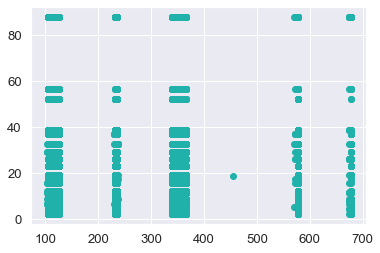

In [193]:
# Plot data, regression line
plt.figure(1)
plt.scatter(data['KY_CD'], data['% Black'], color='lightseagreen')
plt.show()

### 2. Look at the number of instances of unique types of crime (KY_CD)

In [194]:
# Count number of the crime types  
data['KY_CD'].value_counts(ascending=True)

455        1
123        1
349        1
115        1
677        2
119        2
122        3
571        3
237        3
103        4
238        5
120        6
230        6
102        7
356       11
346       11
350       14
363       14
572       16
342       19
675       23
364       26
124       36
125       70
231       72
345       93
358      156
111      160
678      180
114      258
       ...  
116      276
355      300
343      364
104      368
353      553
232      615
340      882
113      948
118      997
117     1021
233     1067
352     1125
112     1342
348     1451
236     1452
359     2487
110     2552
121     2679
347     2920
126     3168
235     3984
105     4444
106     4618
107     5424
361     7691
109    10629
351    10699
344    13320
578    17028
341    21926
Name: KY_CD, Length: 61, dtype: int64

In [195]:
# Check if the count is correct

data.groupby('KY_CD')['CMPLNT_NUM'].nunique()

KY_CD
102        7
103        4
104      368
105     4444
106     4618
107     5424
109    10629
110     2552
111      160
112     1342
113      948
114      258
115        1
116      276
117     1021
118      997
119        2
120        6
121     2679
122        3
123        1
124       36
125       70
126     3168
230        6
231       72
232      615
233     1067
235     3984
236     1452
       ...  
238        5
340      882
341    21926
342       19
343      364
344    13320
345       93
346       11
347     2920
348     1451
349        1
350       14
351    10699
352     1125
353      553
355      300
356       11
358      156
359     2487
361     7691
363       14
364       26
365      260
455        1
571        3
572       16
578    17028
675       23
677        2
678      180
Name: CMPLNT_NUM, Length: 61, dtype: int64

### 3. Visualize which types of crime occurred the most.

In [196]:
data_offense_code = data['KY_CD'].value_counts().to_dict()

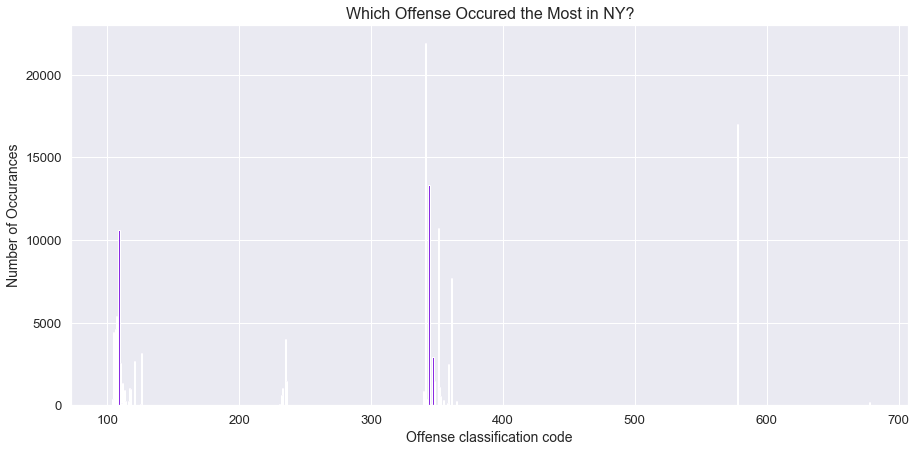

In [197]:
plt.figure(figsize=[15,7])

plt.bar(data_offense_code.keys(), data_offense_code.values(), color='blueviolet')
plt.xlabel('Offense classification code', size=14)
plt.ylabel('Number of Occurances', size=14)
plt.title('Which Offense Occured the Most in NY?', size=16)
plt.show()

### 4. Get the types of crime that happened less than 2000 times

In [198]:
# What are the crimes that happened less than 2000?
droped_data_offense = {key: value for key, value in data_offense_code.items() if value < 2000 }
droped_data_offense.keys()

dict_keys([236, 348, 112, 352, 233, 117, 118, 113, 340, 232, 353, 104, 343, 355, 116, 365, 114, 678, 111, 358, 345, 231, 125, 124, 364, 675, 342, 572, 363, 350, 346, 356, 102, 230, 120, 238, 103, 237, 571, 122, 119, 677, 115, 349, 123, 455])

### 5. Drop the types of crimes that occurred less than 2000 times

In [199]:
for i in droped_data_offense.keys():
    data = data[data.KY_CD != i]

In [200]:
# We only left with the types of crime that occured more than 2000 times 
data["OFNS_DESC"].unique()

array(['OFF. AGNST PUB ORD SENSBLTY &', 'HARRASSMENT 2',
       'ASSAULT 3 & RELATED OFFENSES', 'BURGLARY',
       'CRIMINAL MISCHIEF & RELATED OF', 'GRAND LARCENY', 'PETIT LARCENY',
       'FELONY ASSAULT', 'ROBBERY', 'OFFENSES AGAINST PUBLIC ADMINI',
       'DANGEROUS DRUGS', 'INTOXICATED & IMPAIRED DRIVING',
       'MISCELLANEOUS PENAL LAW', 'GRAND LARCENY OF MOTOR VEHICLE'],
      dtype=object)

### 6. Look at the types of crimes that occurred over 2000 times

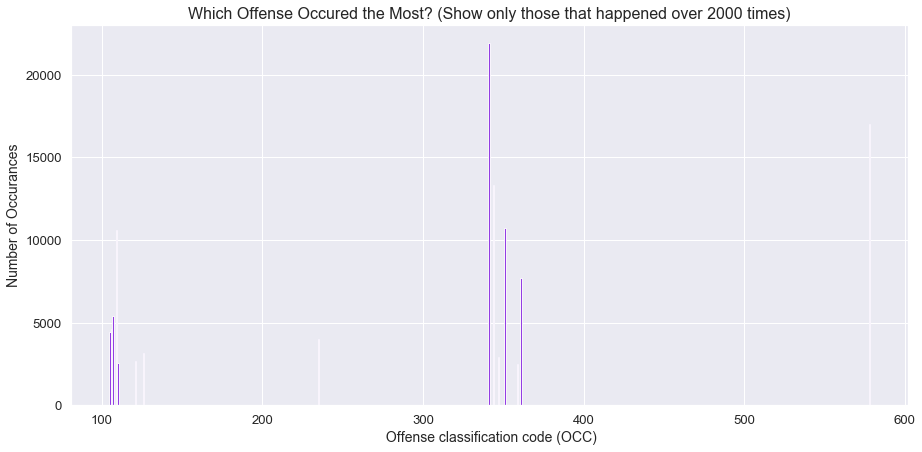

In [201]:
# Visualize only the crimes that have accrue more than 2000 times

updated_data_offense = {key: value for key, value in data_offense_code.items() if value > 2000 }

plt.figure(figsize=[15,7])
 
plt.bar(updated_data_offense.keys(), updated_data_offense.values(), alpha=0.9, color='blueviolet')
plt.xlabel(' Offense classification code (OCC)', size=14)
plt.ylabel('Number of Occurances', size=14)
plt.title('Which Offense Occured the Most? (Show only those that happened over 2000 times)', size=16)

plt.show()

####   6.1. Get those types of crimes that have occurred more than 2,000 times

In [202]:
updated_data_offense

{341: 21926,
 578: 17028,
 344: 13320,
 351: 10699,
 109: 10629,
 361: 7691,
 107: 5424,
 106: 4618,
 105: 4444,
 235: 3984,
 126: 3168,
 347: 2920,
 121: 2679,
 110: 2552,
 359: 2487}

####   6.2. Get the descriptions of the types of crime that happened more than 2000

In [203]:
# data.loc[data['KY_CD'] == 341].head(1)

In [204]:
# data.loc[data['KY_CD'] == 578].head(1)

In [205]:
# data.loc[data['KY_CD'] == 344].head(1)

In [206]:
# data.loc[data['KY_CD'] == 351].head(1)

In [207]:
# data.loc[data['KY_CD'] == 109].head(1)

In [208]:
# data.loc[data['KY_CD'] == 361].head(1)

In [209]:
# data.loc[data['KY_CD'] == 107].head(1)

In [210]:
# data.loc[data['KY_CD'] == 106].head(1)

In [211]:
# data.loc[data['KY_CD'] == 105].head(1)

In [212]:
# data.loc[data['KY_CD'] == 235].head(1)

In [213]:
# data.loc[data['KY_CD'] == 126].head(1)

In [214]:
# data.loc[data['KY_CD'] == 347].head(1)

In [215]:
# data.loc[data['KY_CD'] == 121].head(1)

In [216]:
# data.loc[data['KY_CD'] == 110].head(1)

In [217]:
# data.loc[data['KY_CD'] == 359].head(1)

### 7. Group the types of crime that occurred more than 2000 times based on context and level of crime according to the NY Penal Code

#### These are the types of crime that with the level and the key: 

1. Offenses Involving Theft - MISDEMEANOR  [341]
2. Offenses Against Public Order, Public Sensibilities and the Right To Privacy - VIOLATION [578]
3. Offenses Against the Person Involving Physical Injury, Sexual Conduct, Restraint and Intimidation - MISDEMEANOR [344]
4. Offenses Involving Damage To and Intrusion Upon Property - MISDEMEANOR [351]
5. Offenses Involving Theft - FELONY [109, 105, 110]
6. Offenses Against Public Order, Public Sensibilities and the Right To Privacy - MISDEMEANOR [361, 359]
7. Offenses Involving Damage To and Intrusion Upon Property - FELONY [107, 121]
8. Offenses Against the Person Involving Physical Injury, Sexual Conduct, Restraint and Intimidation - FELONY [106]
9. Offenses Against Public Health And Morals - MISDEMEANOR [235]

**We plan to drop these types of crimes:**
- MISCELLANEOUS PENAL LAW - KY_CD: [126] -  drop because the crime type is very vague / broad. Miscellaneous means varying types. 
- All the crimes that occured less than 3000 times - [121, 110, 359, 347]



#### 7.1. Create new classes (Abbreviation):
-  Group [109, 105, 110] into OFFENSES INVOLVING THEFT - FELONY 
-  Group  [361, 359] into OFFENSES AGAINST PUBLIC - MISDEMEANOR
- Group  [107, 121] into OFFENSES INVOLVING PROPERTY - FELONY

In [218]:
# Create new classes

data.loc[data['KY_CD'] == 109, ['OFNS_DESC']] = 'OFFENSES INVOLVING THEFT'
data.loc[data['KY_CD'] == 105, ['OFNS_DESC']] = 'OFFENSES INVOLVING THEFT'
data.loc[data['KY_CD'] == 110, ['OFNS_DESC']] = 'OFFENSES INVOLVING THEFT'

data.loc[data['KY_CD'] == 361, ['OFNS_DESC']] = 'OFFENSES AGAINST PUBLIC'
data.loc[data['KY_CD'] == 359, ['OFNS_DESC']] = 'OFFENSES AGAINST PUBLIC'

data.loc[data['KY_CD'] == 107, ['OFNS_DESC']] = 'OFFENSES INVOLVING PROPERTY'
data.loc[data['KY_CD'] == 121, ['OFNS_DESC']] = 'OFFENSES INVOLVING PROPERTY'

In [219]:
data.head()

,boro,dbn,sch_name,zoned_dist,CMPLNT_NUM,CMPLNT_FR_,CMPLNT_FR1,KY_CD,OFNS_DESC,LAW_CAT_CD,...,% Female,% Male,% Asian,% Black,% Hispanic,% Multiple Race Categories Not Represented,% White,% Students with Disabilities,% English Language Learners,% Poverty
0,5,31R455,TOTTENVILLE HIGH SCHOOL,31,899609148,2013-08-15,12:00:00,361,OFFENSES AGAINST PUBLIC,MISDEMEANOR,...,48.7,51.3,4.6,1.9,10.7,1.1,81.6,15.3,1.0,31.0
1,5,31R455,TOTTENVILLE HIGH SCHOOL,31,983352892,2013-07-29,15:30:00,578,HARRASSMENT 2,VIOLATION,...,48.7,51.3,4.6,1.9,10.7,1.1,81.6,15.3,1.0,31.0
2,5,31R455,TOTTENVILLE HIGH SCHOOL,31,264059104,2013-11-08,02:30:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,...,48.7,51.3,4.6,1.9,10.7,1.1,81.6,15.3,1.0,31.0
3,5,31R455,TOTTENVILLE HIGH SCHOOL,31,344840948,2013-10-19,22:21:00,107,OFFENSES INVOLVING PROPERTY,FELONY,...,48.7,51.3,4.6,1.9,10.7,1.1,81.6,15.3,1.0,31.0
4,5,31R455,TOTTENVILLE HIGH SCHOOL,31,203854334,2013-08-13,21:45:00,578,HARRASSMENT 2,VIOLATION,...,48.7,51.3,4.6,1.9,10.7,1.1,81.6,15.3,1.0,31.0


### 8. Drop the types of crime under 3000 and drop miscellaneous 


In [220]:
data_offense_code = data['KY_CD'].value_counts().to_dict()

In [221]:
drop_values = {key: value for key, value in data_offense_code.items() if value < 3000 }

In [222]:
drop_values

{347: 2920, 121: 2679, 110: 2552, 359: 2487}

In [223]:
# Here we drop all the rows that have the crime types that happened less than 3000 times
for i in drop_values:
    data = data[data.KY_CD != i]

In [224]:
# Here we drop MISCELLANEOUS PENAL LAW - KY_CD: [126] 
data = data[data.KY_CD != 126]

In [225]:
# Hurray !! We only left with 9 crime types :) 

data["OFNS_DESC"].unique()

array(['OFFENSES AGAINST PUBLIC', 'HARRASSMENT 2',
       'ASSAULT 3 & RELATED OFFENSES', 'OFFENSES INVOLVING PROPERTY',
       'OFFENSES INVOLVING THEFT', 'CRIMINAL MISCHIEF & RELATED OF',
       'PETIT LARCENY', 'FELONY ASSAULT', 'DANGEROUS DRUGS'], dtype=object)

In [226]:
# data with all the droped crime types 

data.shape

(99763, 29)

### Visualize the number of crimes against the types crimes (histogram)

In [227]:
# Sort OFNS_DESC 

data = data.sort_values(['OFNS_DESC']).reset_index(drop=True)


/Users/marinagotovkina/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



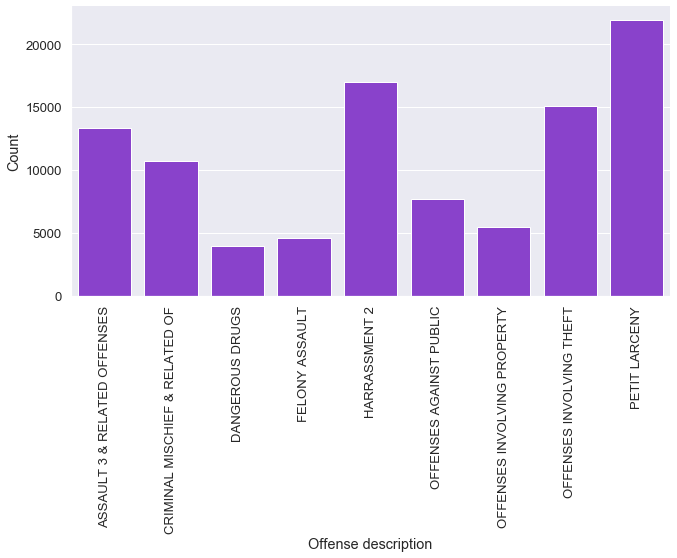

In [228]:
# Make a barchart on how many type crime types (histogram) after grouping


sns.set(font_scale = 1.2)
g = sns.factorplot("OFNS_DESC", data=data, aspect=2, kind="count", color="blueviolet")
g.set(xlabel="Offense description", ylabel='Count')
g.set_xticklabels(rotation=90)

### Vizualization levels of crimes against the types of crimes

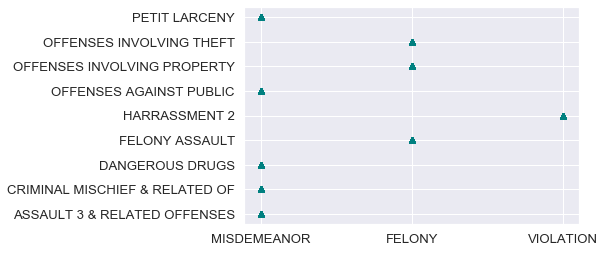

In [229]:
# Plot levels of crimes against the types of crimes

plt.figure(1)
plt.scatter(data['LAW_CAT_CD'], data['OFNS_DESC'], color='teal', marker = '^', alpha= 0.09)
plt.show()

In [230]:
# How many crimes are there in each level?

data.groupby('LAW_CAT_CD')['CMPLNT_NUM'].nunique()

LAW_CAT_CD
FELONY         25115
MISDEMEANOR    57620
VIOLATION      17028
Name: CMPLNT_NUM, dtype: int64

### Replace levels of the crimes (categorical) with numerical (1,2,3)

- VIOLATION - 1
- MISDEMEANOR - 2
- FELONY - 3

In [231]:
data.loc[data['LAW_CAT_CD'] == 'VIOLATION', ['LAW_CAT_CD']] = 1
data.loc[data['LAW_CAT_CD'] == 'MISDEMEANOR', ['LAW_CAT_CD']] = 2
data.loc[data['LAW_CAT_CD'] == 'FELONY', ['LAW_CAT_CD']] = 3

# Data Visualization

In [232]:
# Split data in train and test set. Use StratifiedShuffleSplit to make low (lower than splitting with purely random values)

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 11)
for train_index, test_index in split.split(data, data['boro']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [233]:
crimes_labels = strat_train_set['boro'].copy().to_frame()
crimes = strat_train_set.drop('boro', axis = 1)

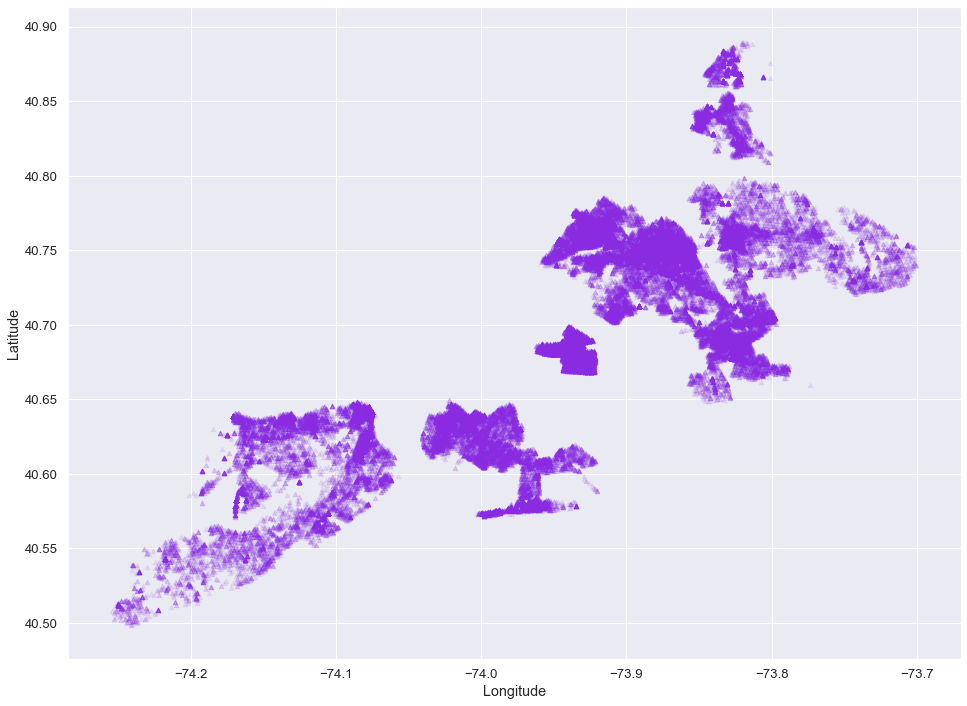

In [234]:
# Plot for data check

crimes.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', marker = '^', color='blueviolet', alpha = 0.09, figsize = (16,12));



TO DO:  Try to do a similar vizualization as above but with KY_CD.

### Visualization School name against Ofns description (scatter plot)

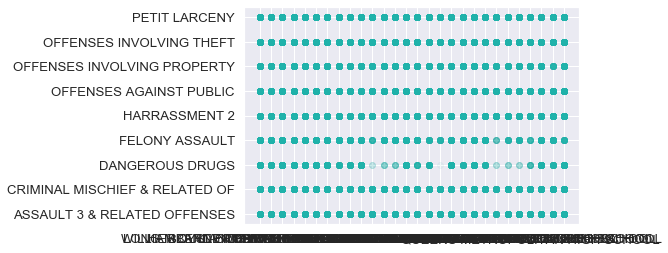

In [235]:
# Plot data, regression line

plt.figure(1)
plt.scatter(data['sch_name'], data['OFNS_DESC'], color='lightseagreen', marker = 'o', alpha= 0.05)
plt.show()

# Heat map will make more sence here 

### Visualization Ofns desc against gender (scatter plot)

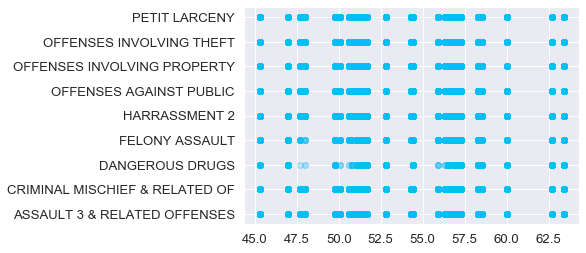

In [236]:
# Plot data, regression line

plt.figure(1)
plt.scatter(data['% Male'], data['OFNS_DESC'], color='deepskyblue', marker = 'o', alpha= 0.05)
plt.show()

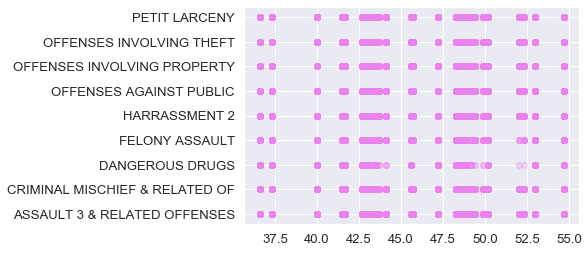

In [237]:
# Plot data, regression line

plt.figure(1)
plt.scatter(data['% Female'], data['OFNS_DESC'], color='violet', marker = 'o', alpha= 0.05)
plt.show()

### Visualization Ofens desc against race (scatter plot)

In [238]:
# Plot data, regression line

#plt.figure(1)
#plt.scatter(data['% Black'], data['OFNS_DESC'], color='darkgoldenrod', marker = '^', alpha= 0.05)
#plt.show()

In [239]:
# Plot data, regression line

# plt.figure(1)
# plt.scatter(data['% Asian'], data['OFNS_DESC'], color='khaki', marker = '^', alpha= 0.05)
# plt.show()

In [240]:
# Plot data, regression line

# plt.figure(1)
# plt.scatter(data['% Hispanic'], data['OFNS_DESC'], color='darkkhaki', marker = '^', alpha= 0.05)
# plt.show()

In [241]:
# Plot data, regression line

# plt.figure(1)
# plt.scatter(data['% White'], data['OFNS_DESC'], color='gainsboro', marker = '^', alpha= 0.05)
# plt.show()

### Visualization Poverty against ofns desc (scatter plot)

In [242]:
# Plot data, regression line

# plt.figure(1)
# plt.scatter(data['% Poverty'], data['OFNS_DESC'], color='lightseagreen', marker = 'o', alpha= 0.02)
# plt.show()

### Visualization Poverty against zoned dist (scatter plot)

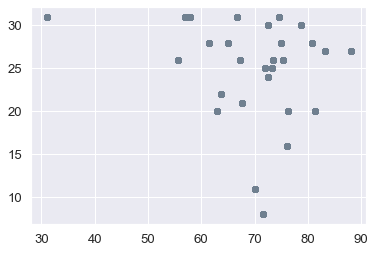

In [243]:
# Plot data, regression line

plt.figure(1)
plt.scatter(data['% Poverty'], data['zoned_dist'], color='slategrey', marker = 'o', alpha= 0.09)
plt.show()

### Visualization Poverty against gender (scatter plot)

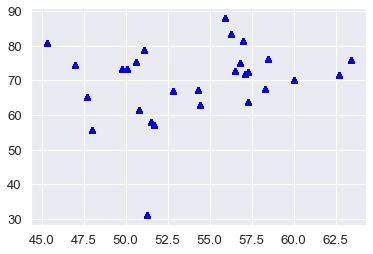

In [244]:
# Plot data, regression line

plt.figure(1)
plt.scatter(data['% Male'], data['% Poverty'], color='blue', marker = '^', alpha= 0.09)
plt.show()

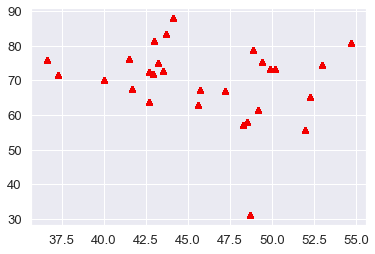

In [245]:
# Plot data, regression line

plt.figure(1)
plt.scatter(data['% Female'], data['% Poverty'], color='red', marker = '^', alpha= 0.09)
plt.show()

### Visualization Poverty against race (scatter plot)

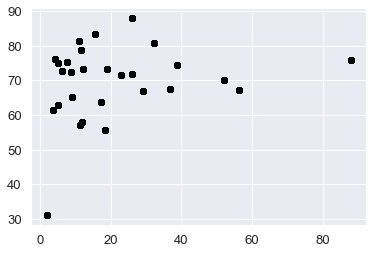

In [246]:
# Plot data, regression line

plt.figure(1)
plt.scatter(data['% Black'], data['% Poverty'], color='black', marker = 'o', alpha= 0.09)
plt.show()

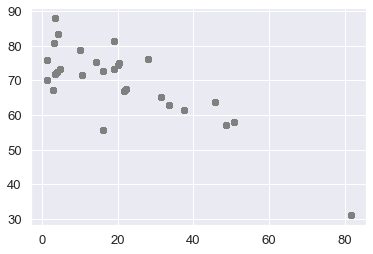

In [247]:
# Plot data, regression line

plt.figure(1)
plt.scatter(data['% White'], data['% Poverty'], color='grey', marker = 'o', alpha= 0.09)
plt.show()

### Visualization Poverty against race (linear regression )

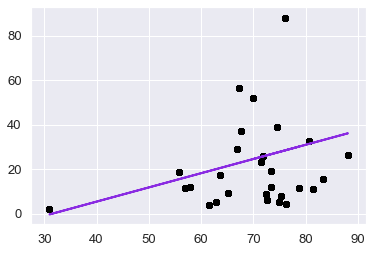

In [248]:
# Try to use linear regression first..

regr = linear_model.LinearRegression()

#Transform the array to avoid deprecation issues

poverty_x = data['% Poverty'].values.reshape(-1,1)

# Train the model using the training sets

regr.fit(poverty_x, data['% Black'])

plt.plot(data['% Poverty'], regr.predict(poverty_x), color='blueviolet', linewidth=2)
plt.scatter(data['% Poverty'], data['% Black'], color='black')
plt.show()

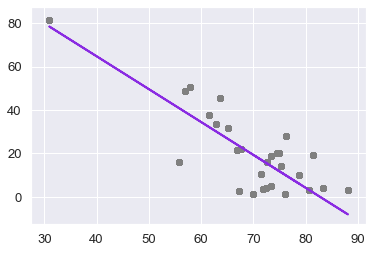

In [249]:
# Try to use linear regression first..

regr = linear_model.LinearRegression()

#Transform the array to avoid deprecation issues

poverty_x = data['% Poverty'].values.reshape(-1,1)

# Train the model using the training sets

regr.fit(poverty_x, data['% White'])

plt.plot(data['% Poverty'], regr.predict(poverty_x), color='blueviolet', linewidth=2)
plt.scatter(data['% Poverty'], data['% White'], color='grey')
plt.show()

### Visualization Poverty against other categories (histogram)

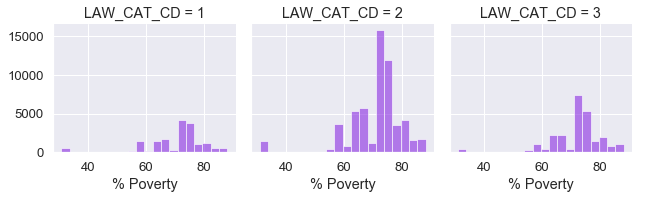

In [250]:
# Here we look at the distribution of crime levels

grid = sns.FacetGrid(data, col='LAW_CAT_CD', palette='muted')
grid.map(plt.hist, '% Poverty', alpha=.6, bins=20, color='blueviolet')
grid.add_legend();



##### Observation: 
There are a lot more MISDEMEANOR happenning. Although, the distribution does not seem to be very different 

##### Normalize the numbers of each crime level (DO NOT NEED)

In [251]:
# How many crimes are there in each level?
# t = data.groupby('LAW_CAT_CD')['CMPLNT_NUM'].nunique()
# sum_crimes = t.sum()

# Calculate percentage of each crime level against overall crime number

# for p in (0, 1, 2):
#    percent_crime = (t[p] / sum_crimes) * 100
#    print(percent_crime)

###                    

# Create new columns for weekday and whether or not it is weekend

In [252]:
data['CMPLNT_FR_']=pd.to_datetime(data['CMPLNT_FR_'])

In [253]:
#create a new column for weekday

data['day_of_week'] = data['CMPLNT_FR_'].dt.day_name()

In [254]:
#weekend = 1 if it is Friday, Saturday or Sunday

data['weekend']= data['day_of_week'].apply(lambda x: 1 if x =='Friday' or x=='Saturday' or x=='Sunday' else 0)

In [255]:
data.shape

(99763, 31)

# Drop data where SAT scores are "s" not a numerical value

In [256]:
data = data[data['SAT Math Avg. Score'] != 's']

In [257]:
data.shape

(98307, 31)

# Convert SAT data

In [258]:
#convert SAT data to numeric values

data['SAT Math Avg. Score'] = pd.to_numeric(data['SAT Math Avg. Score'], errors='ignore')
data['SAT Critical Reading Avg. Score'] = pd.to_numeric(data['SAT Critical Reading Avg. Score'], errors='ignore')
data['SAT Writing Avg. Score'] = pd.to_numeric(data['SAT Writing Avg. Score'], errors='ignore')


/Users/marinagotovkina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/marinagotovkina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/marinagotovkina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [259]:
# Combine all the SAT score in one category because it does not vary a lot

data['Avg Total SAT']=( data['SAT Math Avg. Score'] + data['SAT Critical Reading Avg. Score'] + data['SAT Writing Avg. Score'])


/Users/marinagotovkina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [260]:
# Create percentages of total values for all SAT scores. For each component it is possible to get 800 points

data['SAT Math Avg. Score %']=( data['SAT Math Avg. Score']/800)*100
data['SAT Critical Reading Avg. Score %']=( data['SAT Critical Reading Avg. Score']/800)*100
data['SAT Writing Avg. Score %']=( data['SAT Writing Avg. Score']/800)*100

data['Avg Total SAT %']=( data['Avg Total SAT']/(800*3))*100

/Users/marinagotovkina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/marinagotovkina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/marinagotovkina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

### Visualization Avg Total SAT % against % Poverty

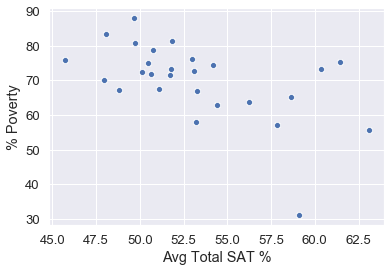

In [261]:
sns.scatterplot(x='Avg Total SAT %', y='% Poverty', x_jitter=0.5, y_jitter=0.5, data = data)

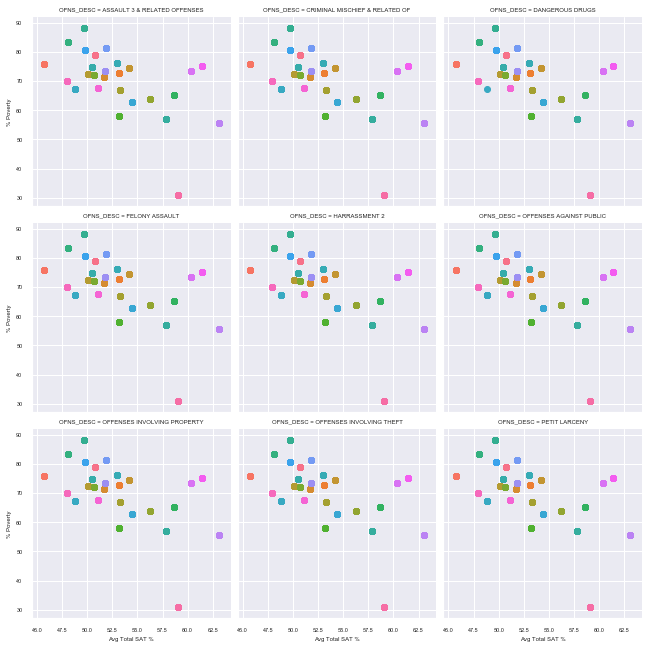

In [262]:
from collections import Counter

sns.set(font_scale=0.50)

g = sns.FacetGrid(data, col="OFNS_DESC", hue="School Name", col_wrap=3 )
g = (g.map(plt.scatter,'Avg Total SAT %','% Poverty'))

# g = sns.FacetGrid(data, col="OFNS_DESC", hue="School Name", col_wrap=3 )
# g = (g.map(plt.scatter,'Avg Total SAT %','% Poverty'))



# TO DO: Add density do you can see how many crimes there are in any school district 

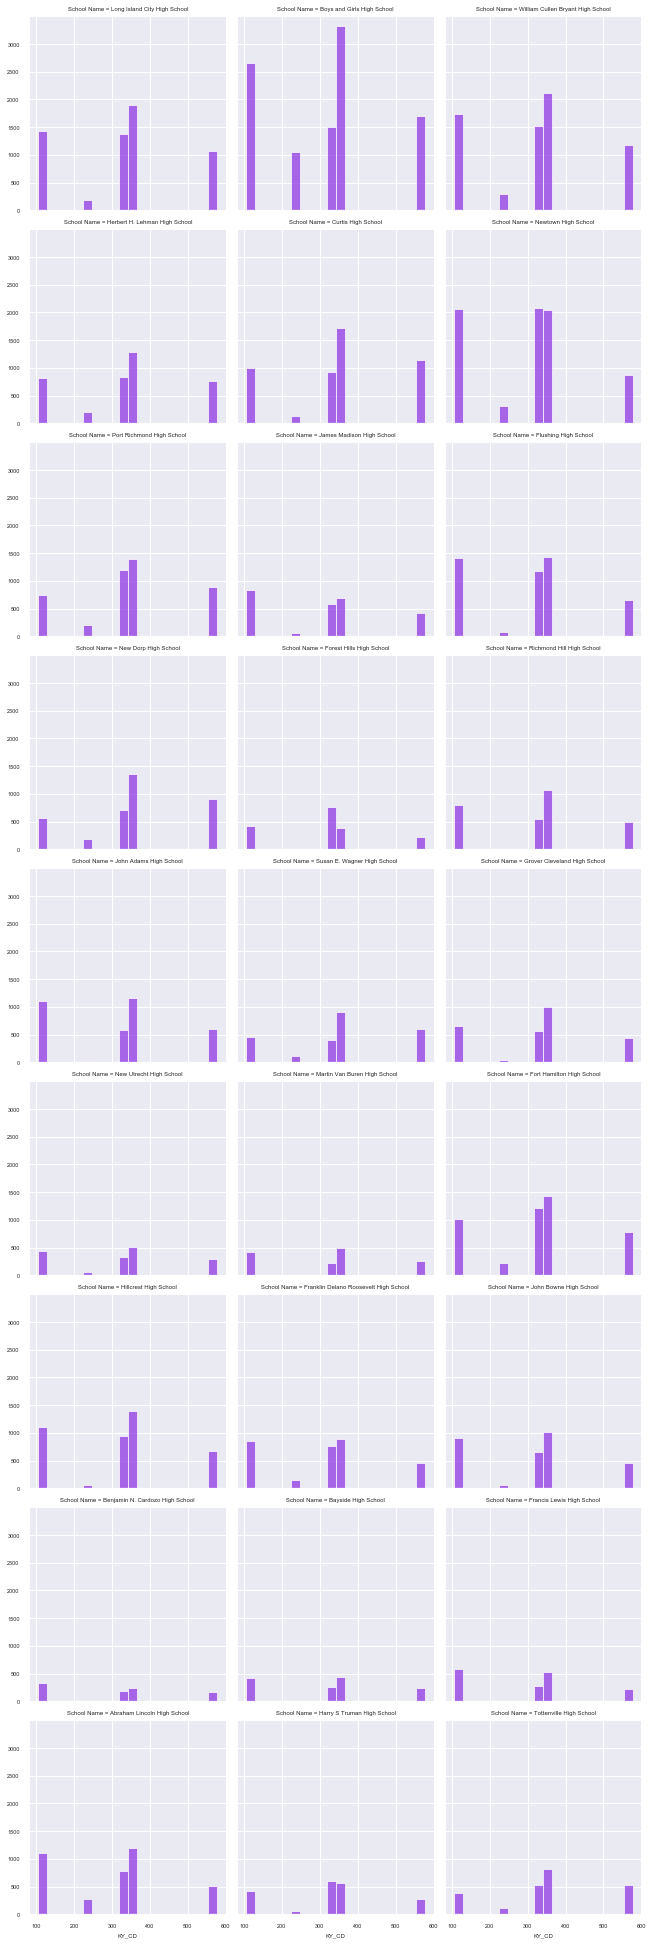

In [263]:
grid = sns.FacetGrid(data, col='School Name', palette='muted', col_wrap=3)
grid.map(plt.hist, 'KY_CD', alpha=.7, bins=20, color='blueviolet')
grid.add_legend();

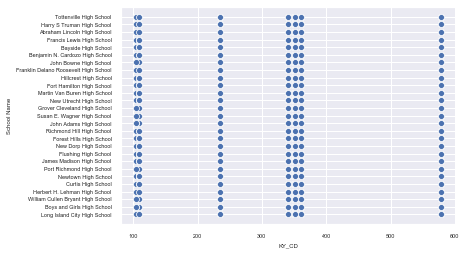

In [264]:
sns.scatterplot(x='KY_CD', y='School Name', x_jitter=0.5, y_jitter=0.5, data = data)

# Calculate percentages of crimes per school district

In [265]:
#calculate total number of crimes per school district

num_crim_sch_district = data.groupby('School Name')['CMPLNT_NUM'].nunique()
num_crim_sch_district

School Name
Abraham Lincoln High School               3879
Bayside High School                       1354
Benjamin N. Cardozo High School            938
Boys and Girls High School               10238
Curtis High School                        4925
Flushing High School                      4764
Forest Hills High School                  1780
Fort Hamilton High School                 4654
Francis Lewis High School                 1625
Franklin Delano Roosevelt High School     3111
Grover Cleveland High School              2705
Harry S Truman High School                1910
Herbert H. Lehman High School             3909
Hillcrest High School                     4182
James Madison High School                 2596
John Adams High School                    3454
John Bowne High School                    3074
Long Island City High School              5966
Martin Van Buren High School              1406
New Dorp High School                      3722
New Utrecht High School                   1633
N

In [266]:
#create pivot of crimes per high school

pivot = data.pivot_table(values='CMPLNT_NUM', index='School Name', columns='OFNS_DESC', 
                         aggfunc=lambda x: len(x.unique()))
pivot.head()

OFNS_DESC,ASSAULT 3 & RELATED OFFENSES,CRIMINAL MISCHIEF & RELATED OF,DANGEROUS DRUGS,FELONY ASSAULT,HARRASSMENT 2,OFFENSES AGAINST PUBLIC,OFFENSES INVOLVING PROPERTY,OFFENSES INVOLVING THEFT,PETIT LARCENY
School Name,,,,,,,,,
Abraham Lincoln High School,480,486,281,219,511,231,185,704,782
Bayside High School,112,195,11,46,234,130,87,282,257
Benjamin N. Cardozo High School,58,85,7,20,169,92,83,233,191
Boys and Girls High School,1834,811,1054,785,1708,681,452,1418,1495
Curtis High School,730,598,139,252,1142,398,216,527,923


In [267]:
#create empty dataframe

test_df_pr_sch_distr = pd.DataFrame()

In [268]:
for i in np.arange(27):
    temp = pd.DataFrame()
    #calculate percentages of crimes per school district
    temp =(((pivot.iloc[i]/num_crim_sch_district.iloc[i])*100).to_frame())
    print(temp)
    #append results to dataframe
    test_df_pr_sch_distr=pd.concat([test_df_pr_sch_distr, temp], axis=1)    

                                Abraham Lincoln High School
OFNS_DESC                                                  
ASSAULT 3 & RELATED OFFENSES                      12.374323
CRIMINAL MISCHIEF & RELATED OF                    12.529002
DANGEROUS DRUGS                                    7.244135
FELONY ASSAULT                                     5.645785
HARRASSMENT 2                                     13.173498
OFFENSES AGAINST PUBLIC                            5.955143
OFFENSES INVOLVING PROPERTY                        4.769270
OFFENSES INVOLVING THEFT                          18.149007
PETIT LARCENY                                     20.159835
                                Bayside High School
OFNS_DESC                                          
ASSAULT 3 & RELATED OFFENSES               8.271787
CRIMINAL MISCHIEF & RELATED OF            14.401773
DANGEROUS DRUGS                            0.812408
FELONY ASSAULT                             3.397341
HARRASSMENT 2               

In [269]:
test_df_pr_sch_distr.head()

,Abraham Lincoln High School,Bayside High School,Benjamin N. Cardozo High School,Boys and Girls High School,Curtis High School,Flushing High School,Forest Hills High School,Fort Hamilton High School,Francis Lewis High School,Franklin Delano Roosevelt High School,...,Long Island City High School,Martin Van Buren High School,New Dorp High School,New Utrecht High School,Newtown High School,Port Richmond High School,Richmond Hill High School,Susan E. Wagner High School,Tottenville High School,William Cullen Bryant High School
OFNS_DESC,,,,,,,,,,,,,,,,,,,,,
ASSAULT 3 & RELATED OFFENSES,12.374323,8.271787,6.183369,17.913655,14.822335,15.176322,6.629213,10.055866,11.938462,10.703954,...,13.643983,10.384068,11.929070,11.267606,14.925575,11.566320,15.941536,13.368125,9.831933,14.327358
CRIMINAL MISCHIEF & RELATED OF,12.529002,14.401773,9.061834,7.921469,12.142132,8.459278,7.359551,12.333477,11.753846,11.507554,...,11.045927,12.588905,14.427727,11.757502,6.603518,11.453146,12.814412,13.087114,11.176471,9.692465
DANGEROUS DRUGS,7.244135,0.812408,0.746269,10.294979,2.822335,1.742233,0.280899,4.941985,0.553846,4.950177,...,3.134428,0.071124,4.889844,3.796693,4.208390,4.413762,0.441876,4.696909,4.957983,4.314240
FELONY ASSAULT,5.645785,3.397341,2.132196,7.667513,5.116751,6.003359,2.022472,3.072626,4.246154,3.728705,...,4.056319,3.769559,2.740462,3.674219,4.776725,3.463105,6.526173,4.175030,2.100840,4.285090
HARRASSMENT 2,13.173498,17.282127,18.017058,16.682946,23.187817,13.685978,12.303371,16.652342,13.969231,14.914818,...,17.867918,18.847795,24.449221,18.248622,11.840325,20.325939,16.757308,24.407868,22.436975,17.242384


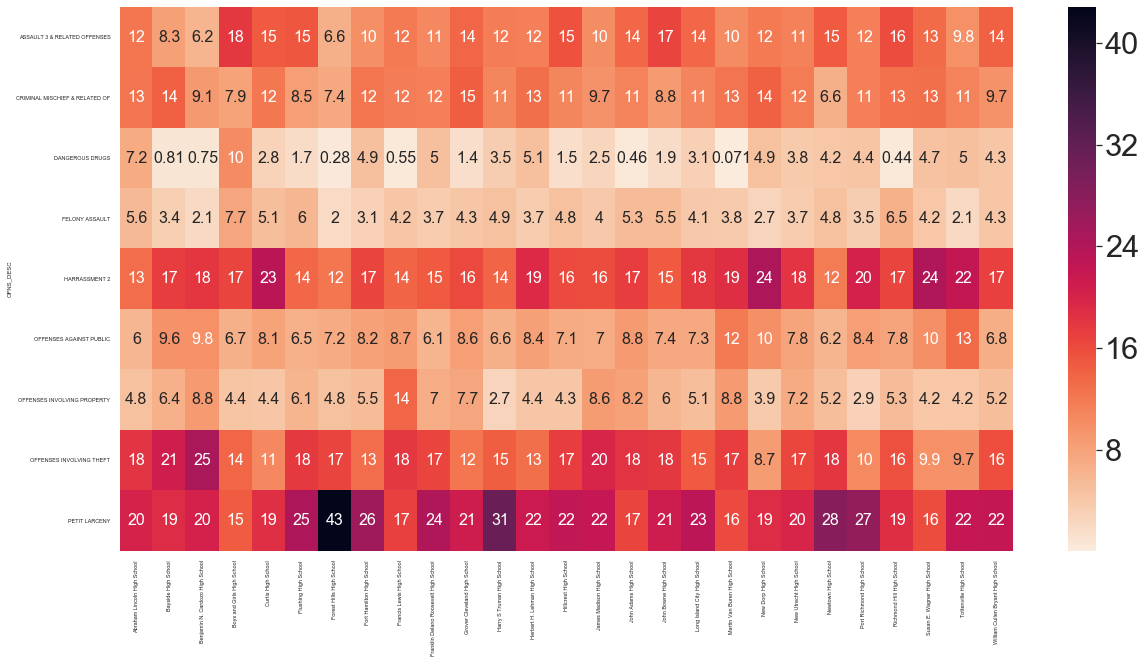

In [270]:
# The heatmap shows the percentages of the types crimes per school district

fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.set(font_scale=2.8)
cmap_rev = sns.cm.rocket_r
sns.heatmap(test_df_pr_sch_distr, annot=True, cmap=cmap_rev, ax=ax, annot_kws={"size": 16})

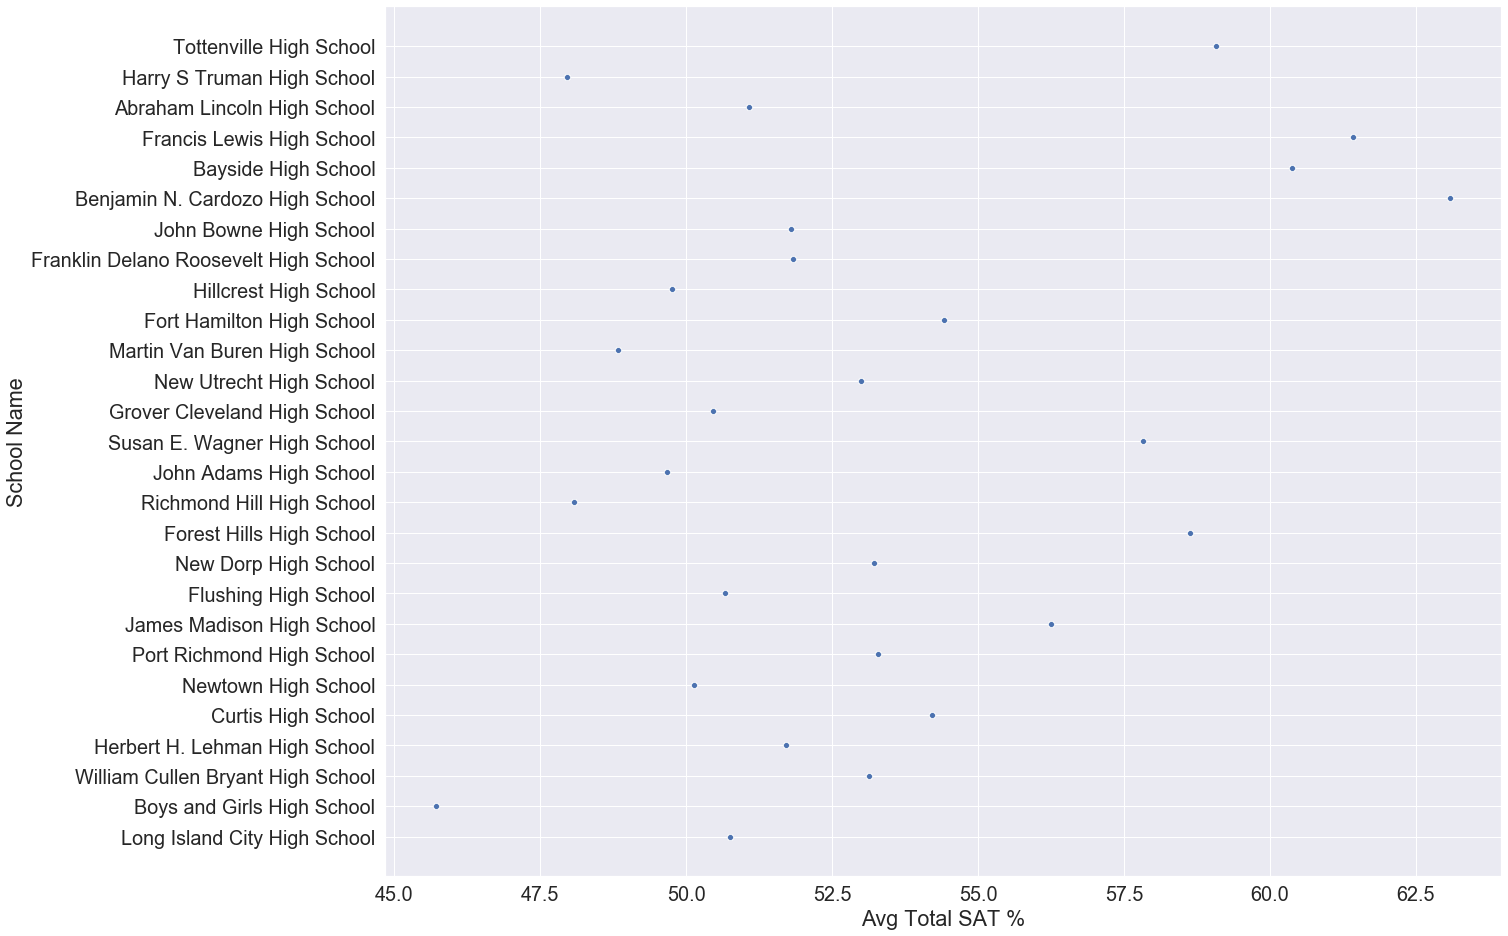

In [271]:
# Look at the SAT scores per school district in order to much it with the heatmap above

sns.set(font_scale=1.8)
fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches
sns.scatterplot(x='Avg Total SAT %', y='School Name', data = data, ax=ax)

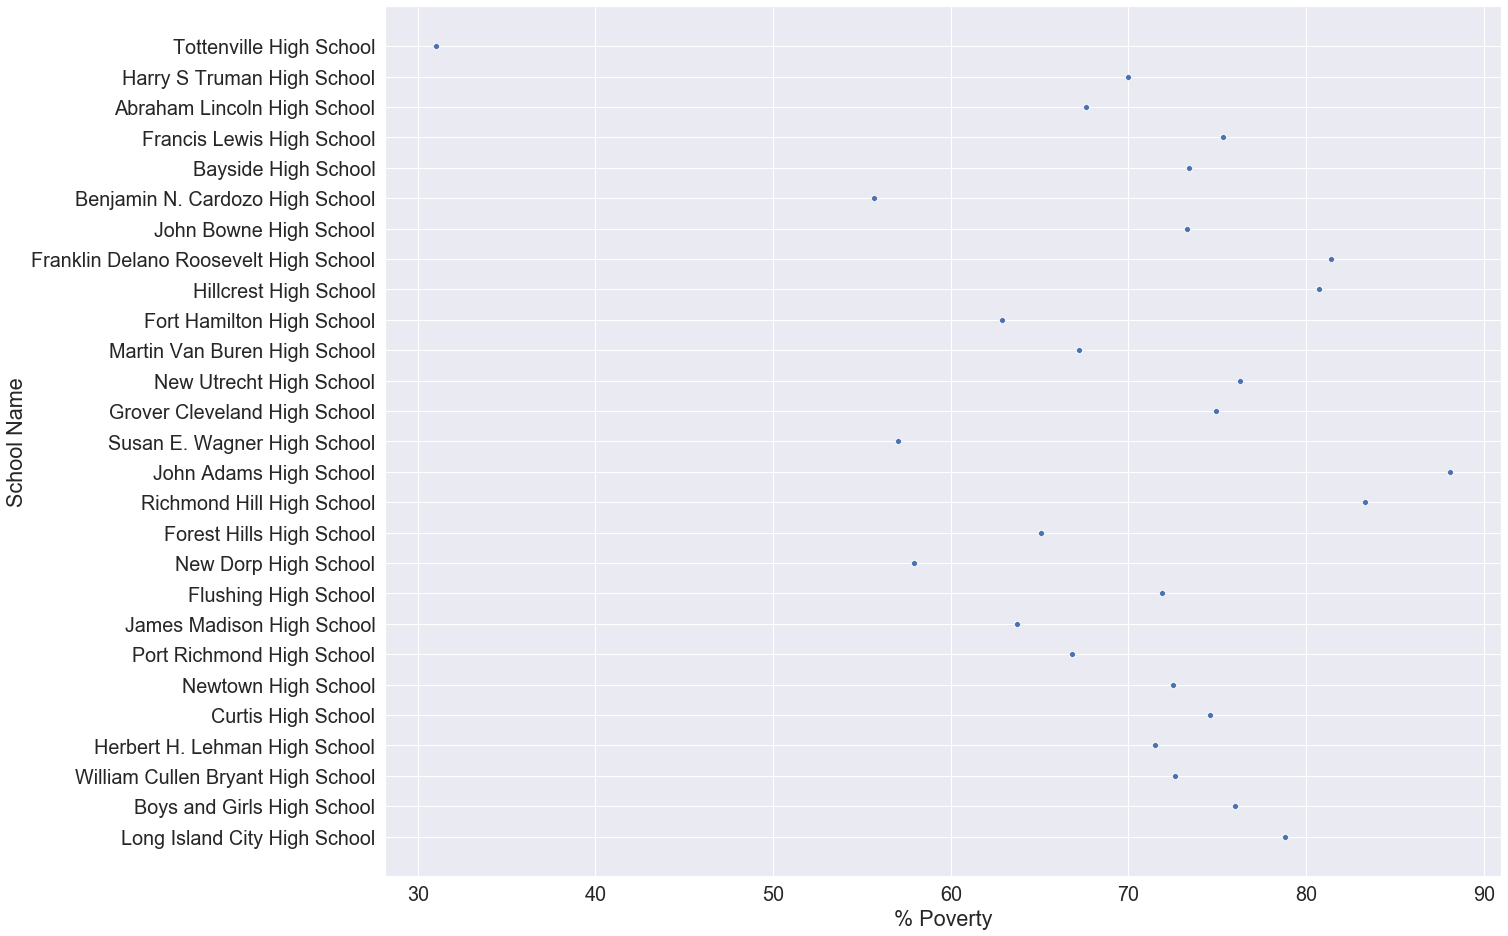

In [272]:
# Look at the Poverty % per school district in order to much it with the heatmap above

sns.set(font_scale=1.8)
fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches
sns.scatterplot(x='% Poverty', y='School Name', data = data, ax=ax)

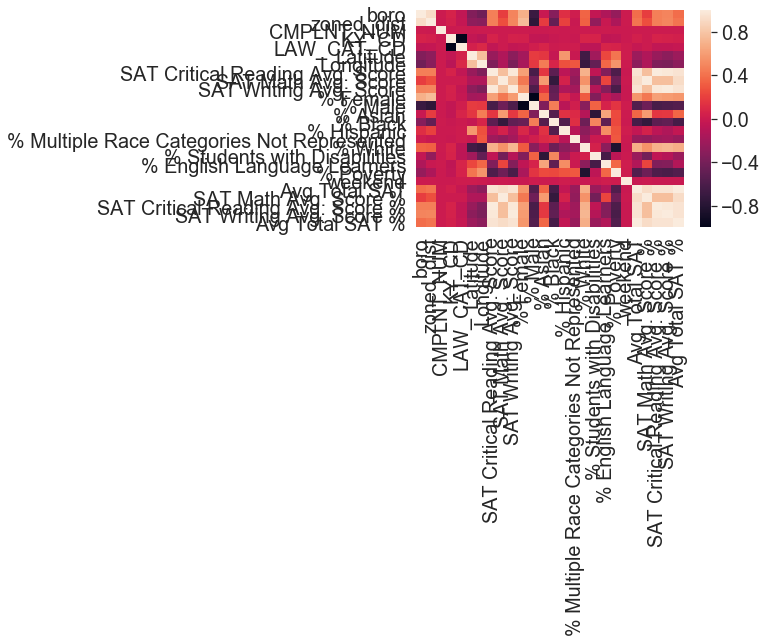

In [273]:
#heatmap

import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Do some prediction

In [274]:
data

,boro,dbn,sch_name,zoned_dist,CMPLNT_NUM,CMPLNT_FR_,CMPLNT_FR1,KY_CD,OFNS_DESC,LAW_CAT_CD,...,% Students with Disabilities,% English Language Learners,% Poverty,day_of_week,weekend,Avg Total SAT,SAT Math Avg. Score %,SAT Critical Reading Avg. Score %,SAT Writing Avg. Score %,Avg Total SAT %
0,4,30Q450,LONG ISLAND CITY HIGHSCHOOL CAMPUS,30,246255682,2013-01-31,04:58:00,344,ASSAULT 3 & RELATED OFFENSES,2,...,16.3,13.0,78.8,Thursday,0,1218.0,52.500,50.375,49.375,50.750000
1,3,16K455,BOYS AND GIRLS HIGH SCHOOL,16,304560466,2013-09-09,20:55:00,344,ASSAULT 3 & RELATED OFFENSES,2,...,22.2,3.2,76.0,Monday,0,1097.0,46.250,45.625,45.250,45.708333
2,4,30Q445,WILLIAM CULLEN BRYANT HIGH SCHOOL CAMPUS,30,238629293,2013-02-01,22:30:00,344,ASSAULT 3 & RELATED OFFENSES,2,...,12.7,16.7,72.6,Friday,1,1275.0,56.125,51.750,51.500,53.125000
3,2,08X405,HERBERT H LEHMAN HIGH SCHOOL CAMPUS,8,914728331,2013-05-20,15:00:00,344,ASSAULT 3 & RELATED OFFENSES,2,...,23.7,9.4,71.5,Monday,0,1241.0,54.500,51.500,49.125,51.708333
4,5,31R450,CURTIS HIGH SCHOOL,31,211896411,2013-05-29,00:30:00,344,ASSAULT 3 & RELATED OFFENSES,2,...,18.9,5.8,74.6,Wednesday,0,1301.0,54.375,54.625,53.625,54.208333
5,4,24Q455,NEWTOWN HIGH SCHOOL CAMPUS,24,352533544,2013-03-18,03:30:00,344,ASSAULT 3 & RELATED OFFENSES,2,...,11.5,31.7,72.5,Monday,0,1203.0,55.000,47.875,47.500,50.125000
6,4,24Q455,NEWTOWN HIGH SCHOOL CAMPUS,24,527871028,2013-05-28,14:50:00,344,ASSAULT 3 & RELATED OFFENSES,2,...,11.5,31.7,72.5,Tuesday,0,1203.0,55.000,47.875,47.500,50.125000
7,5,31R445,PORT RICHMOND HIGH SCHOOL,31,596217022,2013-02-16,16:40:00,344,ASSAULT 3 & RELATED OFFENSES,2,...,26.6,5.5,66.8,Saturday,1,1279.0,54.750,53.000,52.125,53.291667
8,3,22K425,JAMES MADISON HIGH SCHOOL,22,657760641,2013-01-28,10:45:00,344,ASSAULT 3 & RELATED OFFENSES,2,...,12.7,12.5,63.7,Monday,0,1350.0,59.375,54.500,54.875,56.250000
9,4,24Q455,NEWTOWN HIGH SCHOOL CAMPUS,24,486226975,2013-01-19,21:20:00,344,ASSAULT 3 & RELATED OFFENSES,2,...,11.5,31.7,72.5,Saturday,1,1203.0,55.000,47.875,47.500,50.125000


Try to look at what level of crime is likely to happen based on weekend or weekday

### Train the model

In [275]:
from sklearn import linear_model
from sklearn import preprocessing

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert LAW_CAT_CD variable to numeric
encoded_crime_level = label_encoder.fit_transform(data["LAW_CAT_CD"])

In [276]:
data["LAW_CAT_CD"].unique()

array([2, 3, 1])

In [277]:
# Amount of data for each LAW_CAT_CD data
data['LAW_CAT_CD'].value_counts().to_dict()

{2: 56749, 3: 24713, 1: 16845}

In [278]:
data["weekend"].unique()

array([0, 1])

In [279]:
# Amount of data for each weekend data
data['weekend'].value_counts().to_dict()

{0: 55691, 1: 42616}

In [280]:
# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver='lbfgs')

# Train the model
log_model.fit(X = pd.DataFrame(encoded_crime_level), 
              y = data["weekend"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [281]:
# Check trained model intercept
b = log_model.intercept_
print(b)

# Check trained model coefficients
m = log_model.coef_
print(m)

[-0.29675638]
[[0.02698767]]


In [282]:
data.describe()

,boro,zoned_dist,CMPLNT_NUM,KY_CD,LAW_CAT_CD,Latitude,Longitude,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,...,% White,% Students with Disabilities,% English Language Learners,% Poverty,weekend,Avg Total SAT,SAT Math Avg. Score %,SAT Critical Reading Avg. Score %,SAT Writing Avg. Score %,Avg Total SAT %
count,98307.000000,98307.000000,9.830700e+04,98307.000000,98307.000000,98307.000000,98307.000000,98307.000000,98307.000000,98307.000000,...,98307.000000,98307.000000,98307.000000,98307.000000,98307.000000,98307.000000,98307.000000,98307.000000,98307.000000,98307.000000
mean,3.798458,24.520360,5.498437e+08,321.608685,2.080035,40.693219,-73.935682,406.258089,437.952140,401.266187,...,16.977314,16.202591,14.187466,71.499560,0.433499,1245.476416,54.744017,50.782261,50.158273,51.894851
std,0.802628,6.146355,2.600813e+08,153.212970,0.645241,0.075619,0.112300,27.257616,37.478721,29.535524,...,17.243876,4.376100,9.176900,9.476672,0.495560,88.819681,4.684840,3.407202,3.691941,3.700820
min,2.000000,8.000000,1.000024e+08,105.000000,1.000000,40.498905,-74.254560,365.000000,370.000000,362.000000,...,1.200000,10.100000,1.000000,31.000000,0.000000,1097.000000,46.250000,45.625000,45.250000,45.708333
25%,3.000000,20.000000,3.243916e+08,109.000000,2.000000,40.630667,-73.998946,386.000000,420.000000,380.000000,...,3.500000,12.700000,5.600000,67.600000,0.000000,1203.000000,52.500000,48.250000,47.500000,50.125000
50%,4.000000,26.000000,5.500037e+08,341.000000,2.000000,40.694910,-73.922428,402.000000,437.000000,395.000000,...,10.500000,14.700000,13.700000,72.600000,0.000000,1241.000000,54.625000,50.250000,49.375000,51.708333
75%,4.000000,30.000000,7.742103e+08,351.000000,3.000000,40.751647,-73.843358,424.000000,451.000000,416.000000,...,21.600000,19.400000,19.700000,76.000000,1.000000,1279.000000,56.375000,53.000000,52.000000,53.291667
max,5.000000,31.000000,9.999934e+08,578.000000,3.000000,40.889945,-73.700316,480.000000,545.000000,489.000000,...,81.600000,26.600000,36.200000,88.100000,1.000000,1514.000000,68.125000,60.000000,61.125000,63.083333


### Make prediction

That is just an attempt the prediction was not performed properly

In [283]:
preds = log_model.predict_proba(X=pd.DataFrame(encoded_crime_level))
preds = pd.DataFrame(preds)
preds.columns = ["Weekend_prob", "Weekday_prob"]  

In [284]:
# Generate table of predictions vs LAW_CAT_CD
pd.crosstab(data["LAW_CAT_CD"], preds.loc[:, "Weekday_prob"])

Weekday_prob,0.42635060340476394,0.4329638780112472,0.43960112332862383
LAW_CAT_CD,,,
1,16290,555,0
2,0,54477,998
3,367,1033,23313


In [285]:
train_features = pd.DataFrame([encoded_crime_level]).T

# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver='lbfgs')

# Train the model
log_model.fit(X = train_features ,
              y = data["weekend"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [286]:
# Check trained model intercept
print('Trained model intercept', log_model.intercept_)

Trained model intercept [-0.29675638]


In [287]:
# Check trained model coefficients
print('Trained model coefficients', log_model.coef_)

Trained model coefficients [[0.02698767]]


In [288]:
# Make predictions
preds = log_model.predict(X=train_features)

In [289]:
# Generate table of predictions vs actual
pd.crosstab(preds,data["weekend"])

# 1: weekend
# 0: weekday

weekend,0,1
row_0,,
0,55691,42616


In [290]:
log_model.score(X = train_features ,
                y = data["weekend"])

0.5665008595522191

In [291]:
from sklearn import metrics

# View confusion matrix
metrics.confusion_matrix(y_true=data["weekend"],  # True labels
                         y_pred=preds) # Predicted labels

array([[55691,     0],
       [42616,     0]])

In [292]:
# View summary of common classification metrics
print(metrics.classification_report(y_true=data["weekend"],
                              y_pred=preds) )

# 1: weekend
# 0: weekday

              precision    recall  f1-score   support

           0       0.57      1.00      0.72     55691
           1       0.00      0.00      0.00     42616

    accuracy                           0.57     98307
   macro avg       0.28      0.50      0.36     98307
weighted avg       0.32      0.57      0.41     98307



/Users/marinagotovkina/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



**Confusion matrix, precision, recall and F1**
- The recall of weekday class is 1.0 which is perfect (all the weekdays have been labelled as such). But the recall of the weekend class is 0.0 which is the worse case. Thus, we can conclude our model is not doing well for this class.
- The F1 score is not computable for the defective products and is 0.72 for the weekdays. In this example, looking at the confusion matrix could have led to re-think our model or our goal. It could have prevented using a useless model.

**ROC and AUROC**
- Another interesting metric is the ROC curve (Receiver Operating Characteristic), defined with respect to a given class (that we will denote C in the following).
- Suppose that for a given point x, we have a model that outputs the probability that this point belongs to C: P(C | x). Based on this probability, we can define a decision rule that consists in saying that x belongs to class C if and only if P(C | x)≥T, where T is a given threshold defining our decision rule. If T=1, a point is labelled as belonging to C only if the model is 100% confident it does. If T=0, every points are labelled as belonging to C.
- Each value of the threshold T generates a point (false positive, true positive) and, then, the **ROC curve** is the curve described by the ensemble of points generated when T varies from 1 to 0. This curve starts at point (0,0), ends at point (1,1) and is increasing. **A good model will have a curve that increases quickly from 0 to 1 (meaning that only a little precision has to be sacrificed to get a high recall).**

In [293]:
# Source of this code: https://www.kaggle.com/assafco/nyc-crime-vs-education-geovisualisation-tutorial

!pip install plotly
import plotly.express as px
!pip install folium
import folium

sns.set(rc={'figure.figsize':(12,10)})
sns.set(style="white", context="talk")

%matplotlib inline

positions = list(zip(data['Latitude'], data['Longitude']))
fol = folium.Map(location=[40.75,-73.98], zoom_start=10, tiles = tiles)
pos_samp = sample(positions, 22000)
HeatMap(pos_samp, radius = 8).add_to(fol) 
fol